<a href="https://colab.research.google.com/github/drina14/AI_programming_project/blob/main/Machine_Learning_Mini_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
N_SAMPLES = 100
np.random.seed(42)
house_size = np.random.randint(400, 4000, size=N_SAMPLES)
base_price = 50000
price_per_sqft = 150
noise = np.random.normal(0, 50000, size=N_SAMPLES)
house_price = base_price + (price_per_sqft * house_size) + noise

data = pd.DataFrame({
    'Size_sqft': house_size,
    'Price_USD': house_price
})

data.to_csv('house_price_data.csv', index=False)

print(" Dataset created and saved as 'house_price_data.csv'.")
print("\nFirst 5 rows of the generated DataFrame:")
print(data.head())

 Dataset created and saved as 'house_price_data.csv'.

First 5 rows of the generated DataFrame:
   Size_sqft      Price_USD
0       3574  623392.977091
1       3907  544220.838034
2       1260  267223.211928
3       1694  305375.033404
4       1530  303159.662473


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported if not globally available

try:
    df = pd.read_csv('house_price_data.csv')
    print("\n Dataset loaded from 'house_price_data.csv'.")
except FileNotFoundError:
    print(" Error: 'house_price_data.csv' not found. Ensure you ran the dataset generation step first.")
    exit()

X = df[['Size_sqft']]
y = df['Price_USD']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    )

print(f"\nTraining set size (80%): {len(X_train)} samples")
print(f"Testing set size (20%): {len(X_test)} samples")


 Dataset loaded from 'house_price_data.csv'.

Training set size (80%): 80 samples
Testing set size (20%): 20 samples


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print("\n--- Model Training ---")
model.fit(X_train, y_train)
print("✅ Model training complete.")
print(f"Learned Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Learned Intercept: {model.intercept_:.2f}")
y_pred = model.predict(X_test)
print("\n--- Sample Predictions ---")
results = pd.DataFrame({
    'Actual Price': y_test.values.flatten()[:5],
    'Predicted Price': y_pred.flatten()[:5]
})
print(results.round(2))


--- Model Training ---
✅ Model training complete.
Learned Coefficient (Slope): 149.50
Learned Intercept: 54505.58

--- Sample Predictions ---
   Actual Price  Predicted Price
0     531854.44        631436.51
1     579815.38        593014.32
2     281313.08        318078.85
3     601936.65        563562.28
4     219496.02        142562.68



--- Model Evaluation ---
Mean Absolute Error (MAE): $39,800.52
R-squared (R²): 0.9017

--- Interpretation ---
MAE: On average, the model's predictions are off by $39,801.
R²: The R-squared value of 0.9017 means that 90.17% of the variance in house prices is predictable from the house size.


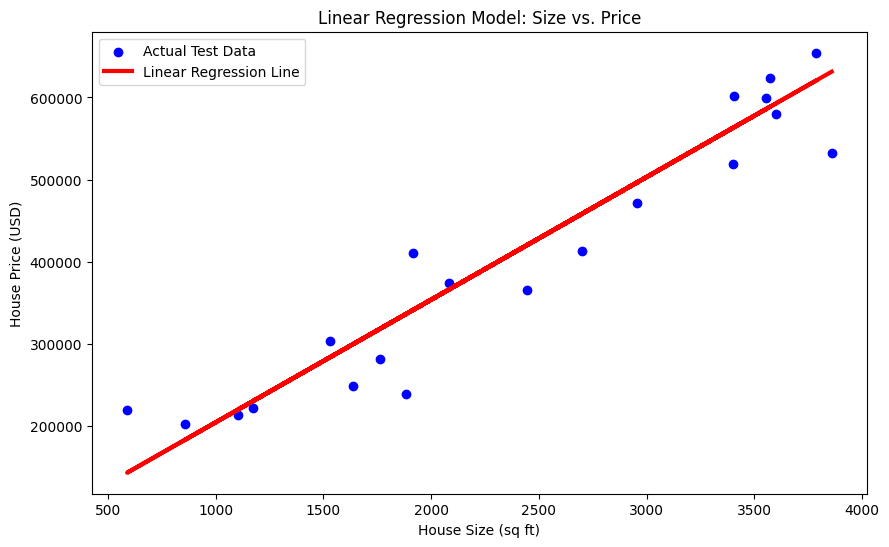

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("\n--- Interpretation ---")
print(f"MAE: On average, the model's predictions are off by ${mae:,.0f}.")
print(f"R²: The R-squared value of {r2:.4f} means that {r2*100:.2f}% of the variance in house prices is predictable from the house size.")
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data') # Actual data points
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear Regression Line') # The predicted line
plt.title('Linear Regression Model: Size vs. Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (USD)')
plt.legend()
plt.show()